In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re 
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import nltk

In [2]:
df = pd.read_csv('british_airways_reviews_all.csv')
df.head()

,Date Published,Rating,Title,Author,Content
0,2025-01-15,1,"""70 days chasing BA’s complaints department""",R Layne,✅ Trip Verified | I booked through BA becaus...
1,2025-01-09,1,"""BA refused to reimburse me""",Michael Chastain,✅ Trip Verified | British airways lost bags ...
2,2025-01-05,1,"""the flight was delayed""",S Herron,✅ Trip Verified | The check in process and rew...
3,2025-01-04,1,"""BA forced us to buy new tickets""",G Marton,"✅ Trip Verified | We flew in November 2023, ..."
4,2025-01-03,1,“staff had no sympathy or empathy”,Raeesa Carrim,✅ Trip Verified | I left for London from Johan...


### Data cleaning

In [3]:
df.shape

(3903, 5)

In [4]:
df.describe()

,Rating
count,3903.000000
mean,4.684602
std,3.179684
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


In [5]:
df.isnull().sum()

Date Published    0
Rating            0
Title             0
Author            0
Content           0
dtype: int64

In [6]:
df.duplicated().sum()

82

In [7]:
#df.drop_duplicates(inplace=True)
# tidak perlu dihapus

In [8]:
def clean_ba_content(content):
    content = re.sub(r'@[a-Za-z0-9_]+', '', content)
    content = re.sub(r'#\w+', '', content)
    content = re.sub(r'RT[\s]+', '', content)

    content = re.sub(r'https?://\S+', '', content)
    content = re.sub(r'\S+', ' ', content).strip()

    return content

In [9]:
#df['Content'] = df['Content'].apply(clean_ba_content)

In [10]:
df['Trip Verified'] = df['Content'].str.contains('✅ Trip Verified').map({True: 'Yes', False: 'No'})
df['Content'] = df['Content'].str.replace('✅ Trip Verified | ', '', regex=False)
df.head()

,Date Published,Rating,Title,Author,Content,Trip Verified
0,2025-01-15,1,"""70 days chasing BA’s complaints department""",R Layne,I booked through BA because Loganair don’t h...,Yes
1,2025-01-09,1,"""BA refused to reimburse me""",Michael Chastain,British airways lost bags in LHR then found ...,Yes
2,2025-01-05,1,"""the flight was delayed""",S Herron,The check in process and reward/loyalty progra...,Yes
3,2025-01-04,1,"""BA forced us to buy new tickets""",G Marton,"We flew in November 2023, but it took this l...",Yes
4,2025-01-03,1,“staff had no sympathy or empathy”,Raeesa Carrim,I left for London from Johannesburg at 21:15 o...,Yes


### exploratory data analysis 

In [11]:
df['Trip Verified'].value_counts()

Trip Verified
No     2599
Yes    1304
Name: count, dtype: int64

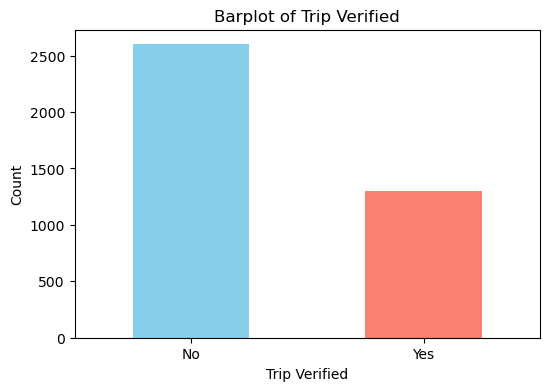

In [12]:
plt.figure(figsize=(6, 4))
df['Trip Verified'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Barplot of Trip Verified')
plt.xlabel('Trip Verified')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [13]:
df['Rating'].value_counts()

Rating
1     949
2     444
3     424
8     386
10    343
9     323
7     319
4     264
5     245
6     206
Name: count, dtype: int64

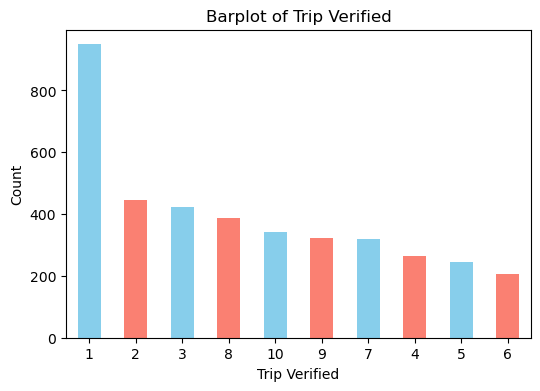

In [14]:
plt.figure(figsize=(6, 4))
df['Rating'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Barplot of Trip Verified')
plt.xlabel('Trip Verified')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


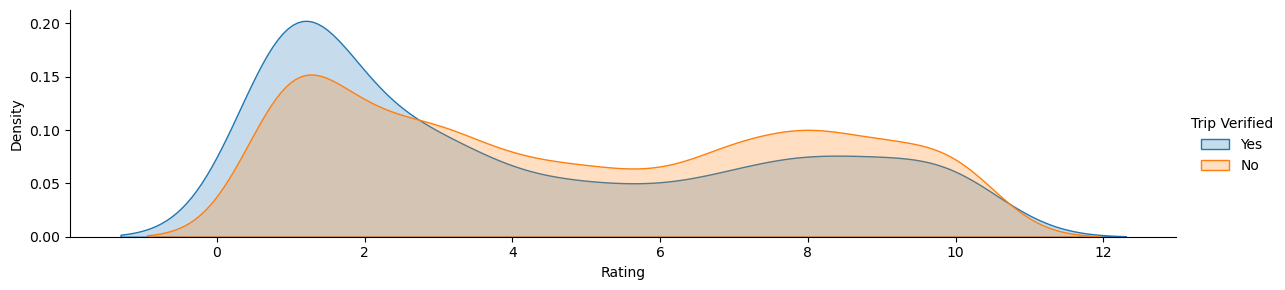

In [15]:
facet = sns.FacetGrid(df, hue="Trip Verified", aspect=4)
facet.map(sns.kdeplot, "Rating", shade = True)
facet.add_legend()
plt.show()
#sns.countplot(data=df, x='Rating', hue='Trip Verified')

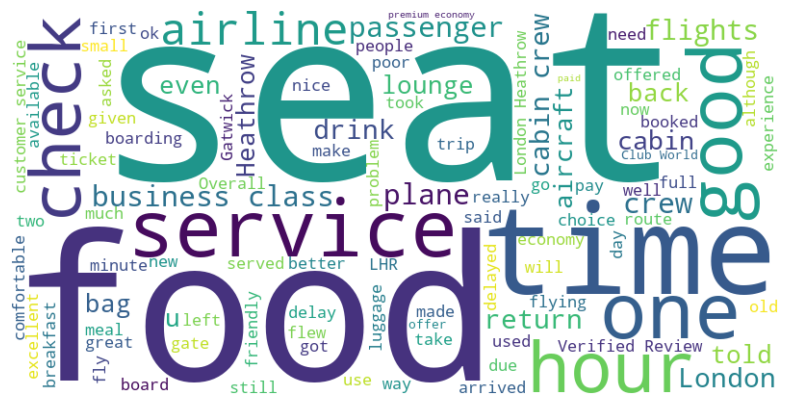

In [16]:
# Gabungkan semua teks dari kolom Content
all_text = " ".join(df["Content"])

# Hapus kata-kata umum yang tidak berguna (stop words)
stopwords = set(STOPWORDS)
stopwords.update(["BA", "British", "Airways", "flight", "airport", "staff"])  # Tambahkan kata yang tidak relevan

# Buat WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=100
).generate(all_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hilangkan sumbu
plt.show()


In [17]:
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Analisis sentimen menggunakan VADER
def classify_sentiment_vader(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:  # Skor positif
        return "Positive"
    elif score['compound'] < -0.05:  # Skor negatif
        return "Negative"
    else:  # Netral
        return "Neutral"

# Tambahkan kolom sentimen
df['Sentiment'] = df['Content'].apply(classify_sentiment_vader)

print(df)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


     Date Published  Rating                                         Title  \
0        2025-01-15       1  "70 days chasing BA’s complaints department"   
1        2025-01-09       1                  "BA refused to reimburse me"   
2        2025-01-05       1                      "the flight was delayed"   
3        2025-01-04       1             "BA forced us to buy new tickets"   
4        2025-01-03       1            “staff had no sympathy or empathy”   
...             ...     ...                                           ...   
3898     2012-08-29       4               British Airways customer review   
3899     2012-08-28       9               British Airways customer review   
3900     2011-10-12       5               British Airways customer review   
3901     2011-10-11       4               British Airways customer review   
3902     2011-10-09       4               British Airways customer review   

                Author                                            Content  

In [18]:
df.head()

,Date Published,Rating,Title,Author,Content,Trip Verified,Sentiment
0,2025-01-15,1,"""70 days chasing BA’s complaints department""",R Layne,I booked through BA because Loganair don’t h...,Yes,Positive
1,2025-01-09,1,"""BA refused to reimburse me""",Michael Chastain,British airways lost bags in LHR then found ...,Yes,Negative
2,2025-01-05,1,"""the flight was delayed""",S Herron,The check in process and reward/loyalty progra...,Yes,Negative
3,2025-01-04,1,"""BA forced us to buy new tickets""",G Marton,"We flew in November 2023, but it took this l...",Yes,Negative
4,2025-01-03,1,“staff had no sympathy or empathy”,Raeesa Carrim,I left for London from Johannesburg at 21:15 o...,Yes,Negative


In [19]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Positive    2246
Negative    1603
Neutral       54
Name: count, dtype: int64

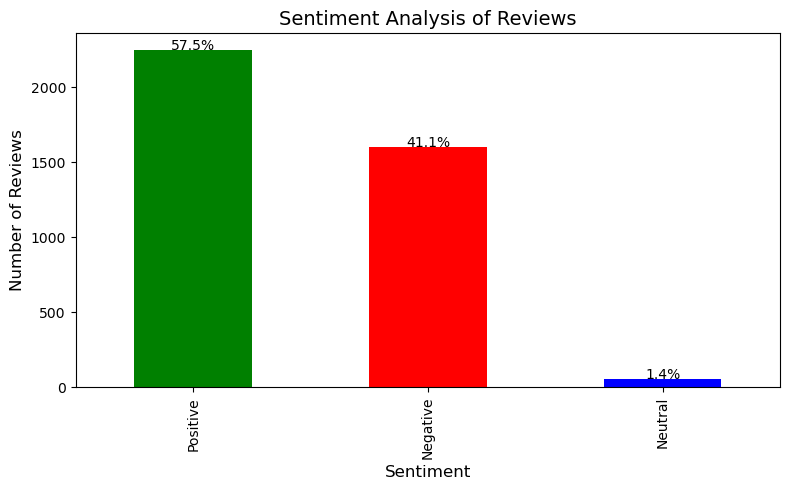

In [28]:
import matplotlib.pyplot as plt

# Menghitung jumlah total ulasan
total_reviews = sentiment_counts.sum()

# Membuat plot
ax = sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], figsize=(8, 5))

# Menambahkan persentase di atas setiap bar
for i, count in enumerate(sentiment_counts):
    percentage = (count / total_reviews) * 100
    ax.text(i, count + 1, f'{percentage:.1f}%', ha='center', fontsize=10)  # `count + 1` untuk memberi jarak di atas bar

# Memberi label dan judul
plt.title('Sentiment Analysis of Reviews', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Menampilkan plot
plt.tight_layout()  # Untuk menghindari label keluar area
plt.show()



In [21]:
from sklearn.feature_extraction.text import CountVectorizer
# Inisialisasi CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=10)  # Menghapus stop words & pilih 10 kata teratas
X = vectorizer.fit_transform(df['Content'])

# Mendapatkan kata-kata paling sering
word_freq = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Frequency': X.sum(axis=0).A1
}).sort_values(by='Frequency', ascending=False)

print(word_freq)


      Word  Frequency
4   flight       7217
1       ba       5124
8  service       3001
7     seat       2469
5     food       2427
6   london       2281
3     crew       2274
2  british       2270
0  airways       2238
9     time       2216


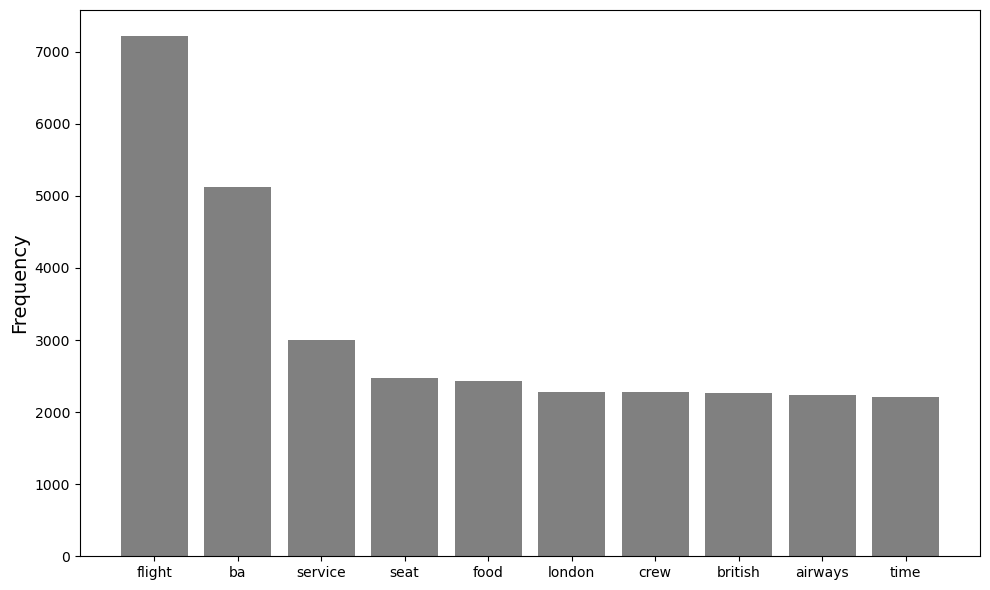

In [27]:
# Visualisasi data menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(word_freq['Word'], word_freq['Frequency'], color='gray')
#plt.title('10 Kata Paling Sering Muncul', fontsize=16)
#plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#plt.xticks(rotation=45)  # Memiringkan label sumbu X
plt.tight_layout()  # Menyesuaikan layout agar rapi
plt.show()


In [22]:
# Daftar kategori dengan kata kunci
categories = {
    "Airport Service": ["airport", "ground staff", "check-in", "boarding", "gate"],
    "Delays": ["delay", "late", "timing", "punctuality"],
    "Seat Comfort": ["seat", "comfort", "legroom"],
    "Food and Drinks": ["food", "meal", "drink", "beverage"],
}

# Hitung jumlah ulasan negatif per kategori
category_counts = {}

for category, keywords in categories.items():
    count = df['Content'].str.contains("|".join(keywords), case=False, na=False).sum()
    category_counts[category] = count

# Hasil
for category, count in category_counts.items():
    print(f"{category}: {count} reviews")


Airport Service: 1500 reviews
Delays: 1331 reviews
Seat Comfort: 2401 reviews
Food and Drinks: 2385 reviews


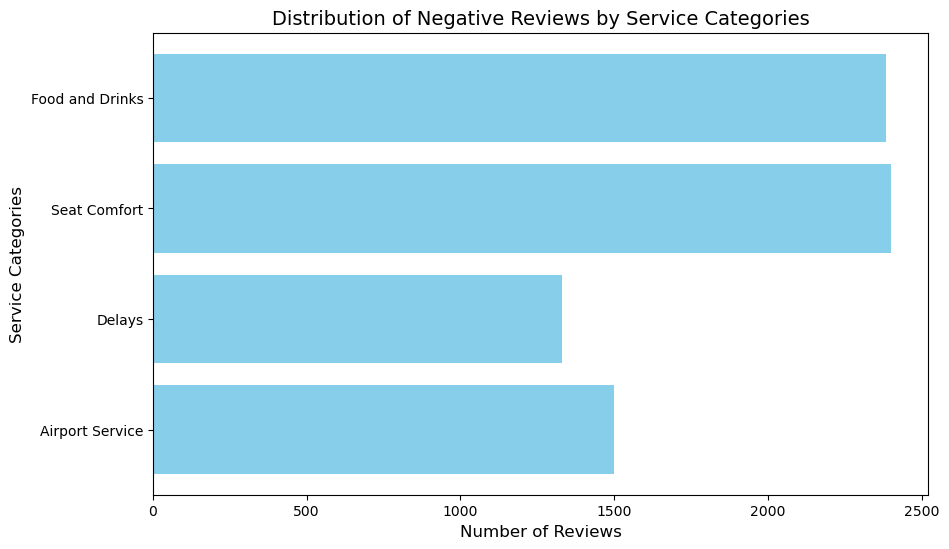

In [23]:
import matplotlib.pyplot as plt

# Data kategori dan jumlah
categories = list(category_counts.keys())
counts = list(category_counts.values())

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.barh(categories, counts, color='skyblue')
plt.title("Distribution of Negative Reviews by Service Categories", fontsize=14)
plt.xlabel("Number of Reviews", fontsize=12)
plt.ylabel("Service Categories", fontsize=12)
plt.show()
